##### Análise de Clusters

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns   

In [2]:
# Carregar datasets
olist_orders = pd.read_csv("../data/raw/olist_orders_dataset.csv")
olist_order_items = pd.read_csv("../data/raw/olist_order_items_dataset.csv")
olist_customers = pd.read_csv("../data/raw/olist_customers_dataset.csv")

olist_products = pd.read_csv("../data/raw/olist_products_dataset.csv")
olist_reviews = pd.read_csv("../data/raw/olist_order_reviews_dataset.csv")
olist_geolocation = pd.read_csv("../data/raw/olist_customers_dataset.csv")

customer_cluster = pd.read_csv("../data/processed/customers_clusters.csv")

In [3]:
customers = customer_cluster.merge(olist_customers, how="inner", on="customer_unique_id")
customers_orders = customers.merge(olist_orders, how="inner", on="customer_id")
customers_orders_items = customers_orders.merge(olist_order_items, how="inner", on="order_id")
customers_products = customers_orders_items.merge(olist_products, how="inner", on="product_id")
customers_reviews = customers_orders.merge(olist_reviews, how="inner", on="order_id")

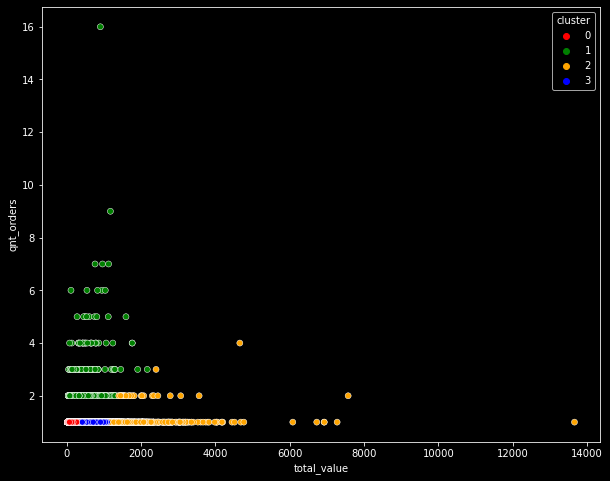

In [4]:
# Recapitulando os clusters
plt.figure(figsize= (10, 8))
ax = sns.scatterplot(x= 'total_value', y='qnt_orders', hue='cluster', data= customer_cluster, palette= ['red', 'green', 'orange', 'blue'])
plt.show()

In [5]:
customer_cluster.groupby('cluster').sum()

,Unnamed: 0,total_value,qnt_orders
cluster,,,
0,3940088829,9186209.92,82959
1,135073373,824767.93,6040
2,39643249,1491151.99,869
3,396032202,4233397.19,8331


##### Cluster 2

In [6]:
customers[customers.cluster ==2].describe()

,Unnamed: 0,total_value,qnt_orders,cluster,customer_zip_code_prefix
count,873.000000,873.000000,873.000000,873.0,873.000000
mean,47549.602520,1807.677537,1.084765,2.0,42081.644903
std,27891.460358,876.058703,0.334773,0.0,30090.421650
min,132.000000,1147.500000,1.000000,2.0,1020.000000
25%,23649.000000,1327.540000,1.000000,2.0,14801.000000
50%,46924.000000,1544.620000,1.000000,2.0,35447.000000
75%,71057.000000,2023.580000,1.000000,2.0,70160.000000
max,94978.000000,13664.080000,4.000000,2.0,99615.000000


In [7]:
customers[customers.cluster ==2].customer_state.value_counts()

SP    269
RJ    120
MG     91
RS     51
PR     51
BA     40
SC     39
CE     20
PA     18
DF     18
GO     18
PE     17
PB     17
MT     15
MS     14
ES     13
MA     12
AL     10
RO      8
SE      7
PI      7
RN      7
TO      5
AM      3
AP      2
AC      1
Name: customer_state, dtype: int64

In [8]:
customers_products.groupby('product_category_name').sum()

,Unnamed: 0,total_value,qnt_orders,cluster,customer_zip_code_prefix,order_item_id,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
product_category_name,,,,,,,,,,,,,,,
agro_industria_e_comercio,9495551,121580.45,221,318,7074653,265,72530.47,5843.60,9908.0,183490.0,498.0,768524.0,6135.0,5043.0,4424.0
alimentos,23967420,54311.74,560,52,14572778,608,29243.51,7253.27,24862.0,649499.0,849.0,330489.0,9831.0,6942.0,7948.0
alimentos_bebidas,12888174,30643.33,309,47,7417624,363,15119.48,4488.62,12028.0,329465.0,540.0,306344.0,6015.0,4398.0,4607.0
artes,9864134,32053.84,217,34,6511501,229,24167.64,4028.57,10002.0,199298.0,394.0,323927.0,10210.0,1754.0,7605.0
artes_e_artesanato,1045689,3269.64,32,8,552696,26,1814.01,370.13,1123.0,19013.0,89.0,32877.0,742.0,262.0,517.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sinalizacao_e_seguranca,9813639,73583.50,218,111,6935707,307,21509.23,6507.82,9887.0,149397.0,461.0,773458.0,6825.0,5710.0,4209.0
tablets_impressao_imagem,3844185,11677.24,92,10,2779396,89,7528.41,1226.20,4642.0,44486.0,155.0,25489.0,2117.0,799.0,1932.0
telefonia,214165185,595645.98,4823,1101,180440116,5143,322379.44,70986.26,236341.0,3439974.0,13150.0,1184501.0,83262.0,28764.0,60657.0


In [9]:
customers_products[customers_products.cluster == 2].describe()

,Unnamed: 0,total_value,qnt_orders,cluster,customer_zip_code_prefix,order_item_id,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,1380.000000,1380.000000,1380.000000,1380.0,1380.000000,1380.000000,1380.000000,1380.000000,1362.000000,1362.000000,1362.000000,1379.000000,1379.000000,1379.00000,1379.000000
mean,47500.954348,1938.727377,1.155797,2.0,43123.967391,2.318116,1026.761210,55.252217,49.452276,1461.724670,2.413363,8028.677302,40.386512,29.10950,30.951414
std,28226.928763,1238.229463,0.503435,0.0,30675.161646,2.642233,839.953736,54.537565,9.034565,1085.426347,1.744578,8739.557379,23.476774,19.62834,16.032753
min,132.000000,1147.500000,1.000000,2.0,1020.000000,1.000000,32.000000,0.070000,14.000000,83.000000,1.000000,50.000000,14.000000,2.00000,11.000000
25%,22806.000000,1344.820000,1.000000,2.0,14632.500000,1.000000,219.900000,24.020000,43.000000,569.250000,1.000000,922.000000,20.000000,15.00000,18.000000
50%,47513.500000,1628.335000,1.000000,2.0,36031.500000,1.000000,1099.000000,38.510000,52.000000,1158.000000,2.000000,3510.000000,34.000000,22.00000,26.000000
75%,72651.500000,2067.735000,1.000000,2.0,74825.000000,3.000000,1460.247500,64.250000,56.000000,1973.000000,4.000000,13350.000000,53.000000,40.00000,40.000000
max,94978.000000,13664.080000,4.000000,2.0,99615.000000,20.000000,6735.000000,409.680000,63.000000,3992.000000,10.000000,30000.000000,105.000000,105.00000,100.000000


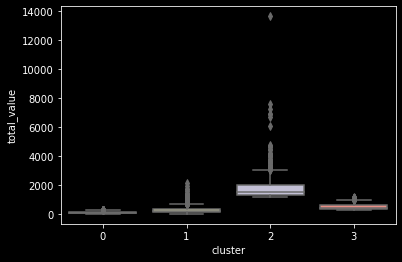

In [25]:
sns.boxplot(x='cluster', y='total_value', data=customer_cluster)
plt.show()

In [11]:
customers_products[customers_products.cluster == 2].product_category_name.value_counts()

informatica_acessorios                            145
pcs                                               131
beleza_saude                                      106
automotivo                                         99
relogios_presentes                                 99
moveis_escritorio                                  91
moveis_decoracao                                   75
esporte_lazer                                      54
ferramentas_jardim                                 49
utilidades_domesticas                              44
construcao_ferramentas_construcao                  44
instrumentos_musicais                              42
bebes                                              38
eletroportateis                                    38
telefonia                                          34
cama_mesa_banho                                    30
eletrodomesticos_2                                 26
telefonia_fixa                                     24
cool_stuff                  

In [12]:
customers_reviews[customers_reviews.cluster == 2].describe()

,Unnamed: 0,total_value,qnt_orders,cluster,customer_zip_code_prefix,review_score
count,862.000000,862.00000,862.000000,862.0,862.000000,862.000000
mean,47665.145012,1805.46522,1.085847,2.0,42023.346868,3.931555
std,27842.832975,862.30042,0.336766,0.0,30140.766322,1.519888
min,132.000000,1147.50000,1.000000,2.0,1020.000000,1.000000
25%,23731.500000,1328.99250,1.000000,2.0,14415.000000,3.000000
50%,46984.500000,1544.79000,1.000000,2.0,35448.500000,5.000000
75%,71032.500000,2024.12750,1.000000,2.0,70095.750000,5.000000
max,94978.000000,13664.08000,4.000000,2.0,99615.000000,5.000000


##### Cluster 1

In [13]:
customers_products[customers_products.cluster == 1].describe()

,Unnamed: 0,total_value,qnt_orders,cluster,customer_zip_code_prefix,order_item_id,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,7274.000000,7274.000000,7274.000000,7274.0,7274.000000,7274.000000,7274.000000,7274.000000,7177.000000,7177.000000,7177.000000,7271.000000,7271.000000,7271.000000,7271.000000
mean,47524.771515,331.005388,2.243745,1.0,33499.409128,1.269453,94.978627,18.505913,48.946774,725.245367,2.048210,1844.904965,30.148810,15.413561,23.159813
std,26964.376345,264.107489,0.945718,0.0,29781.154638,0.751539,99.254283,12.393608,9.989457,633.706110,1.596633,3444.674664,15.967035,12.282548,11.680527
min,106.000000,35.940000,2.000000,1.0,1005.000000,1.000000,2.900000,0.000000,10.000000,4.000000,1.000000,50.000000,11.000000,2.000000,6.000000
25%,24403.500000,158.190000,2.000000,1.0,9470.000000,1.000000,36.850000,12.690000,42.000000,317.000000,1.000000,261.000000,18.000000,8.000000,15.000000
50%,47482.000000,249.900000,2.000000,1.0,22750.000000,1.000000,67.900000,15.855000,52.000000,544.000000,1.000000,650.000000,25.000000,12.000000,20.000000
75%,70483.000000,409.700000,2.000000,1.0,50940.000000,1.000000,119.000000,19.700000,57.000000,903.000000,3.000000,1600.000000,38.000000,20.000000,30.000000
max,94937.000000,2164.400000,16.000000,1.0,99750.000000,11.000000,1199.900000,196.940000,66.000000,3956.000000,15.000000,30000.000000,105.000000,105.000000,118.000000


In [14]:
customers_products[customers_products.cluster == 1].product_category_name.value_counts()

cama_mesa_banho                  1105
moveis_decoracao                  779
esporte_lazer                     672
beleza_saude                      550
informatica_acessorios            526
                                 ... 
portateis_casa_forno_e_cafe         1
pcs                                 1
artigos_de_festas                   1
pc_gamer                            1
fashion_roupa_infanto_juvenil       1
Name: product_category_name, Length: 69, dtype: int64

In [15]:
customers_reviews[customers_reviews.cluster == 1].describe()

,Unnamed: 0,total_value,qnt_orders,cluster,customer_zip_code_prefix,review_score
count,6459.000000,6459.000000,6459.000000,6459.0,6459.000000,6459.000000
mean,47396.792538,301.577266,2.237034,1.0,33950.793312,4.166899
std,27003.203375,239.063446,0.961322,0.0,29774.746584,1.304760
min,106.000000,35.940000,2.000000,1.0,1005.000000,1.000000
25%,24388.000000,147.130000,2.000000,1.0,9750.000000,4.000000
50%,46912.000000,227.240000,2.000000,1.0,22790.000000,5.000000
75%,70442.500000,367.860000,2.000000,1.0,53545.000000,5.000000
max,94937.000000,2164.400000,16.000000,1.0,99750.000000,5.000000


##### Cluster 0

In [16]:
customers_products[customers_products.cluster == 0].describe()

,Unnamed: 0,total_value,qnt_orders,cluster,customer_zip_code_prefix,order_item_id,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,91933.000000,91933.000000,91933.0,91933.0,91933.000000,91933.000000,91933.000000,91933.000000,90552.000000,90552.000000,90552.000000,91919.000000,91919.000000,91919.000000,91919.000000
mean,47540.050950,115.609426,1.0,0.0,34701.114975,1.132607,81.945029,18.001772,48.754749,758.202624,2.209139,1662.279550,29.234979,15.557295,22.337797
std,27422.281706,67.810559,0.0,0.0,29796.176058,0.500189,58.067346,10.328987,10.077485,621.589001,1.728139,2832.420202,15.409748,12.189283,11.076499
min,0.000000,9.590000,1.0,0.0,1003.000000,1.000000,0.850000,0.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,7.000000
25%,23758.000000,61.260000,1.0,0.0,11040.000000,1.000000,37.000000,12.790000,42.000000,341.000000,1.000000,250.000000,18.000000,8.000000,15.000000
50%,47590.000000,100.830000,1.0,0.0,24110.000000,1.000000,65.490000,15.820000,52.000000,589.000000,1.000000,600.000000,24.000000,12.000000,20.000000
75%,71318.000000,158.210000,1.0,0.0,57620.000000,1.000000,113.000000,19.520000,57.000000,947.000000,3.000000,1600.000000,36.000000,20.000000,29.000000
max,94982.000000,310.030000,1.0,0.0,99990.000000,21.000000,300.000000,215.430000,76.000000,3988.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [17]:
customers_products[customers_products.cluster == 0].product_category_name.value_counts()

cama_mesa_banho                  9215
beleza_saude                     7779
esporte_lazer                    7209
moveis_decoracao                 6638
informatica_acessorios           6254
                                 ... 
la_cuisine                          9
fashion_roupa_infanto_juvenil       7
pc_gamer                            5
seguros_e_servicos                  2
pcs                                 1
Name: product_category_name, Length: 73, dtype: int64

In [18]:
customers_reviews[customers_reviews.cluster == 0].describe()

,Unnamed: 0,total_value,qnt_orders,cluster,customer_zip_code_prefix,review_score
count,82525.000000,82525.000000,82525.0,82525.0,82525.000000,82525.000000
mean,47481.934929,110.643422,1.0,0.0,34826.754329,4.127077
std,27427.616489,65.862417,0.0,0.0,29788.697719,1.307393
min,0.000000,9.590000,1.0,0.0,1003.000000,1.000000
25%,23714.000000,58.090000,1.0,0.0,11060.000000,4.000000
50%,47491.000000,95.220000,1.0,0.0,24220.000000,5.000000
75%,71214.000000,150.500000,1.0,0.0,58038.000000,5.000000
max,94982.000000,310.030000,1.0,0.0,99990.000000,5.000000


##### Cluster 3

In [19]:
customers_products[customers_products.cluster == 3].describe()

,Unnamed: 0,total_value,qnt_orders,cluster,customer_zip_code_prefix,order_item_id,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,11546.000000,11546.000000,11546.0,11546.0,11546.000000,11546.000000,11546.000000,11546.000000,11453.000000,11453.000000,11453.000000,11546.000000,11546.000000,11546.000000,11546.000000
mean,47591.475056,513.373247,1.0,3.0,38837.090854,1.533085,334.281355,32.573444,48.877063,981.958701,2.298437,4974.364109,36.252555,24.013511,27.169063
std,27434.470236,199.655731,0.0,0.0,30010.789988,1.155545,225.527976,27.987850,9.677054,745.853727,1.740549,6492.739678,18.981629,18.612550,14.415940
min,7.000000,310.080000,1.0,3.0,1006.000000,1.000000,11.500000,0.000000,5.000000,4.000000,1.000000,2.000000,8.000000,2.000000,6.000000
25%,24013.000000,359.850000,1.0,3.0,13186.500000,1.000000,149.940000,17.000000,42.000000,439.000000,1.000000,600.000000,20.000000,11.000000,16.000000
50%,47885.500000,437.105000,1.0,3.0,29187.500000,1.000000,299.990000,22.385000,51.000000,762.000000,2.000000,1750.000000,30.000000,17.000000,22.000000
75%,71661.750000,619.340000,1.0,3.0,65760.000000,2.000000,429.990000,38.447500,57.000000,1277.000000,3.000000,7350.000000,47.000000,30.000000,35.000000
max,94977.000000,1146.200000,1.0,3.0,99930.000000,15.000000,1199.900000,312.410000,64.000000,3976.000000,14.000000,30000.000000,105.000000,105.000000,105.000000


In [20]:
customers_products[customers_products.cluster == 3].product_category_name.value_counts()

beleza_saude                 1203
relogios_presentes            925
informatica_acessorios        857
moveis_decoracao              810
cama_mesa_banho               748
                             ... 
artigos_de_festas               2
moveis_colchao_e_estofado       2
artes_e_artesanato              1
livros_importados               1
fashion_esporte                 1
Name: product_category_name, Length: 66, dtype: int64

In [21]:
customers_reviews[customers_reviews.cluster == 3].describe()

,Unnamed: 0,total_value,qnt_orders,cluster,customer_zip_code_prefix,review_score
count,8287.000000,8287.000000,8287.0,8287.0,8287.000000,8287.000000
mean,47577.867021,507.923216,1.0,3.0,39288.871123,3.963678
std,27398.596492,196.950446,0.0,0.0,29860.198582,1.451695
min,7.000000,310.100000,1.0,3.0,1006.000000,1.000000
25%,23992.500000,356.100000,1.0,3.0,13215.000000,3.000000
50%,47659.000000,430.670000,1.0,3.0,30180.000000,5.000000
75%,71521.000000,614.295000,1.0,3.0,65619.500000,5.000000
max,94977.000000,1146.200000,1.0,3.0,99930.000000,5.000000


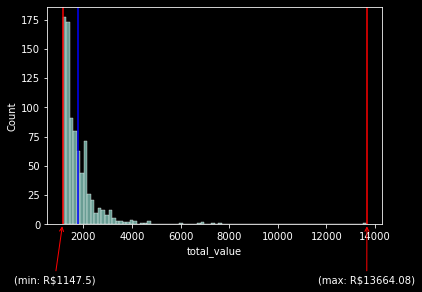

In [22]:
aux = customer_cluster[customer_cluster.cluster ==2]
fig=plt.figure(figsize=(6,4))
ax = fig.add_subplot(1,1,1)
sns.histplot(aux.total_value)
ax.axvline(x= aux.total_value.mean(), ymin= 0, ymax=1, color='b')
ax.axvline(x= aux.total_value.min(), ymin= 0, ymax=1, color='r')
ax.axvline(x= aux.total_value.max(), ymin= 0, ymax=1, color='r')

max=aux.total_value.max()
min=aux.total_value.min()
str_max = '(max: R${})'.format(max)
str_min = '(min: R${})'.format(min)
ax.annotate(str_max, xy=(max,0), xycoords='data', xytext=(max-2000,-50), textcoords='data', arrowprops=dict(arrowstyle="->", connectionstyle="arc3", color='r'))
ax.annotate(str_min, xy=(min,0), xycoords='data', xytext=(min-2000,-50), textcoords='data', arrowprops=dict(arrowstyle="->", connectionstyle="arc3", color='r'))
plt.show()